<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/Joining_Data_with_dplyr_using_LEGO_dataset_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [131]:
# Load
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggplot2)
library(forcats) # for use of fct_reorder

# Joining parts and part categories

In [7]:
# Reading parts dataset
parts = read.csv("/content/parts.csv")
str(parts)

# Reading parts_categories dataset
part_categories = read.csv("/content/part_categories.csv")
str(part_categories)

'data.frame':	35214 obs. of  4 variables:
 $ part_num        : chr  "004229" "004284" "004285" "004490" ...
 $ name            : chr  "Sticker Sheet for Set 295-1" "Sticker Sheet for Set 723-2" "Sticker Sheet for Set 725-2" "Sticker Sheet for Set 365-1" ...
 $ part_cat_id     : int  58 58 58 58 58 58 58 58 58 17 ...
 $ part_material_id: int  1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	65 obs. of  2 variables:
 $ id  : int  1 3 4 5 6 7 8 9 11 12 ...
 $ name: chr  "Baseplates" "Bricks Sloped" "Duplo, Quatro and Primo" "Bricks Special" ...


## Inner Join

In [8]:
# Inner Join.
parts %>% 
	inner_join(part_categories, by = c("part_cat_id" = "id")) %>%
  head(2)

,part_num,name.x,part_cat_id,part_material_id,name.y
,<chr>,<chr>,<int>,<int>,<chr>
1,004229,Sticker Sheet for Set 295-1,58,1,Stickers
2,004284,Sticker Sheet for Set 723-2,58,1,Stickers


## Inner Join adding suffixes

In [9]:
# Inner Join.
parts %>% 
	inner_join(part_categories, by = c("part_cat_id" = "id"), suffix = c("_part", "_category")) %>%
  head(2)

,part_num,name_part,part_cat_id,part_material_id,name_category
,<chr>,<chr>,<int>,<int>,<chr>
1,004229,Sticker Sheet for Set 295-1,58,1,Stickers
2,004284,Sticker Sheet for Set 723-2,58,1,Stickers


# Joining parts and inventory_parts

In [10]:
# Display columns of parts
str(parts)

# Reading inventory_parts dataset
inventory_parts = read.csv("/content/inventory_parts.csv")
str(inventory_parts)

'data.frame':	35214 obs. of  4 variables:
 $ part_num        : chr  "004229" "004284" "004285" "004490" ...
 $ name            : chr  "Sticker Sheet for Set 295-1" "Sticker Sheet for Set 723-2" "Sticker Sheet for Set 725-2" "Sticker Sheet for Set 365-1" ...
 $ part_cat_id     : int  58 58 58 58 58 58 58 58 58 17 ...
 $ part_material_id: int  1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	815847 obs. of  5 variables:
 $ inventory_id: int  1 1 1 1 3 3 3 3 3 3 ...
 $ part_num    : chr  "48379c01" "48395" "mcsport6" "paddle" ...
 $ color_id    : int  72 7 25 0 78 47 29 2 15 15 ...
 $ quantity    : int  1 1 1 1 1 1 1 1 1 2 ...
 $ is_spare    : chr  "f" "f" "f" "f" ...


In [11]:
# I can join by part_num
parts %>%
	inner_join(inventory_parts, by = "part_num") %>%
  dim()

# one-to-many relationship exists between these two tables.

[1] 815847      8

# What's the most common color?

In [12]:
# Reading inventory dataset
inventories = read.csv("//content/inventories.csv")
str(inventories)

# Reading colors dataset
colors = read.csv("/content/colors.csv")
str(colors)

# Reading sets dataset
sets = read.csv("/content/sets.csv")
str(sets)

'data.frame':	15990 obs. of  3 variables:
 $ id     : int  1 3 4 15 16 17 19 21 22 25 ...
 $ version: int  1 1 1 1 1 1 1 1 1 1 ...
 $ set_num: chr  "7922-1" "3931-1" "6942-1" "5158-1" ...
'data.frame':	184 obs. of  4 variables:
 $ id      : int  -1 0 1 2 3 4 5 6 7 8 ...
 $ name    : chr  "[Unknown]" "Black" "Blue" "Green" ...
 $ rgb     : chr  "0033B2" "05131D" "0055BF" "237841" ...
 $ is_trans: chr  "f" "f" "f" "f" ...
'data.frame':	15666 obs. of  5 variables:
 $ set_num  : chr  "001-1" "0011-2" "0011-3" "0012-1" ...
 $ name     : chr  "Gears" "Town Mini-Figures" "Castle 2 for 1 Bonus Offer" "Space Mini-Figures" ...
 $ year     : int  1965 1978 1987 1979 1979 1979 1979 1978 1965 1966 ...
 $ theme_id : int  1 84 199 143 143 143 143 186 1 366 ...
 $ num_parts: int  43 12 0 12 12 12 18 15 3 403 ...


## Multiple joins sets, inv, inv_parts and colors.

In [13]:
# Inner join for the colors table
df <- sets %>%
	inner_join(inventories, by = "set_num") %>%
	inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
	inner_join(colors, by = c("color_id" = "id"), suffix = c("_set", "_color"))

## Top 5 common colors with count()

In [14]:
# Top 5 common colors
df %>%
  count(name_color, sort=TRUE) %>%
  head(5)

,name_color,n
,<chr>,<int>
1,Black,151078
2,White,92820
3,Light Bluish Gray,82331
4,Red,67427
5,Dark Bluish Gray,63107


# Difference between datasets

## Example Batmobile and Batwing

In [15]:
# Inner join 
inventory_joined <- inventories %>%
	inner_join(inventory_parts, by = c("id" = "inventory_id")) %>%
  select(-id, -version) # removing columns we won't use

head(inventory_joined, 2)

,set_num,part_num,color_id,quantity,is_spare
,<chr>,<chr>,<int>,<int>,<chr>
1,7922-1,48379c01,72,1,f
2,7922-1,48395,7,1,f


## Filter with string pattern

In [16]:
# Find out what set_num is Batwing
df %>%
  filter(grepl(pattern = "Batwing", x=name_set)) %>%
  head(1)

,set_num,name_set,year,theme_id,num_parts,id,version,part_num,color_id,quantity,is_spare,name_color,rgb,is_trans
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,10823-1,Batwing Adventure,2017,653,28,19553,1,12592c02,0,1,f,Black,05131D,f


In [17]:
# Create two datasets
batmobile <- inventory_joined %>%
  filter(set_num == "7784-1")

batwing <- inventory_joined %>%
  filter(set_num == "30301-1")

head(batmobile,1)
head(batwing,1)

,set_num,part_num,color_id,quantity,is_spare
,<chr>,<chr>,<int>,<int>,<chr>
1,7784-1,2339,0,12,f


,set_num,part_num,color_id,quantity,is_spare
,<chr>,<chr>,<int>,<int>,<chr>
1,30301-1,10247,14,1,f


## What parts are in common between batmobiles

In [59]:
# Combine both
bat_inner = batmobile %>%
  inner_join(batwing, by = c("part_num", "color_id"), suffix = c("_batmobile", "_batwing")) %>%
  select(part_num, quantity_batmobile, quantity_batwing, color_id)

head(bat_inner)

,part_num,quantity_batmobile,quantity_batwing,color_id
,<chr>,<int>,<int>,<int>
1,3020,3,1,72
2,3832,4,1,0
3,43722,1,2,0
4,43723,1,2,0
5,54200,10,1,0
6,54200,10,2,0


In [64]:
head(batmobile,2)

,set_num,part_num,color_id,quantity,is_spare
,<chr>,<chr>,<int>,<int>,<chr>
1,7784-1,2339,0,12,f
2,7784-1,2357,0,6,f


In [68]:
batmobile %>%
  group_by(part_num, color_id) %>%
  summarize(sum(quantity)) %>%
  head(2)

`summarise()` has grouped output by 'part_num'. You can override using the `.groups` argument.



part_num,color_id,sum(quantity)
<chr>,<int>,<int>
2339,0,12
2357,0,6


## How many part_num are different?

In [19]:
# Combine both
batmobile %>%
  full_join(batwing, by = c("part_num", "color_id"), suffix = c("_batmobile", "_batwing")) %>%
  select(part_num, quantity_batmobile, quantity_batwing) %>%
  filter(is.na(quantity_batmobile)|is.na(quantity_batwing)) %>%
  dim()

[1] 189   3

# Join table with itself when hierarchical

In [49]:
# Reading themes dataset
themes = read.csv("/content/themes.csv")
head(themes)

,id,name,parent_id
,<int>,<chr>,<int>
1,1,Technic,NA
2,2,Arctic Technic,1
3,3,Competition,1
4,4,Expert Builder,1
5,5,Model,1
6,6,Airport,5


In [51]:
themes_hierarchical <- themes %>% 
	# Inner join the themes table
	inner_join(themes, by = c("id" = "parent_id"), suffix = c("_parent", "_child"))

head(themes_hierarchical,4)

,id,name_parent,parent_id,id_child,name_child
,<int>,<chr>,<int>,<int>,<chr>
1,1,Technic,NA,2,Arctic Technic
2,1,Technic,NA,3,Competition
3,1,Technic,NA,4,Expert Builder
4,1,Technic,NA,5,Model


In [52]:
# how many themes have still parent_id
themes_hierarchical %>%
  count(is.na(parent_id))

is.na(parent_id),n
<lgl>,<int>
FALSE,149
TRUE,379


## Twice inner_join

In [55]:
# There are 149 Themes with parents_id
themes %>% 
  inner_join(themes, by = c("id" = "parent_id"), suffix = c("_parent", "_child")) %>%
  inner_join(themes, by = c("id_child" = "parent_id"), suffix = c("_parent", "_grandchild")) %>%
  dim()

[1] 149   7

# Semi-join

Semi and Anti join are **filtering joins.**

If we want to filter keeping columns as the right table, but only observations in both datasets.

In [69]:
batmobile %>%
  semi_join(batwing, by= c("color_id", "part_num"))

set_num,part_num,color_id,quantity,is_spare
<chr>,<chr>,<int>,<int>,<chr>
7784-1,3020,72,3,f
7784-1,3832,0,4,f
7784-1,43722,0,1,f
7784-1,43723,0,1,f
7784-1,54200,0,10,f
7784-1,54383,0,1,f
7784-1,54384,0,1,f


# Anti-join

Opposite of Semi-join

## Are there any sets not in inventory?

In [82]:
sets %>%
  anti_join(inventories, by=c("set_num")) %>%
  dim()

# All sets are in inventory.

[1] 0 5

# Which set is missing version 1?

anti_join is a great tool for finding problems like this.

In [85]:
head(inventories,2)

,id,version,set_num
,<int>,<int>,<chr>
1,1,1,7922-1
2,3,1,3931-1


In [86]:
# Use filter() to extract version 1 
version_1_inv <- inventories %>%
  filter(version == 1)

# Use anti_join() to find which set is missing a version 1
sets %>%
  anti_join(version_1_inv, by = "set_num")

set_num,name,year,theme_id,num_parts
<chr>,<chr>,<int>,<int>,<int>
10261-1,Roller Coaster,2018,673,4124
10875-1,Cargo Train,2018,634,105
76081-1,The Milano vs. The Abilisk,2017,483,461


# Comparing colors 

In [104]:
# Transform datasets to aggregate by color.
batmobile_colors <- batmobile %>%
  group_by(color_id) %>%
  summarize(total= sum(quantity))

batwing_colors <- batwing %>%
  group_by(color_id) %>%
  summarize(total= sum(quantity))

head(batmobile_colors,3)

color_id,total
<int>,<int>
0,543
1,33
4,16


## Full join with na replacement from tidyr.

In [102]:
colors = read.csv("/content/colors.csv")
head(colors)

,id,name,rgb,is_trans
,<int>,<chr>,<chr>,<chr>
1,-1,[Unknown],0033B2,f
2,0,Black,05131D,f
3,1,Blue,0055BF,f
4,2,Green,237841,f
5,3,Dark Turquoise,008F9B,f
6,4,Red,C91A09,f


In [151]:
# Full join, use of replace_na from tidyr.
bat_colors <- batmobile_colors %>%
  full_join(batwing_colors, by="color_id", suffix=c("_mobile", "_wing")) %>%
  replace_na(list(total_mobile=0, total_wing=0)) %>%
  inner_join(colors, by=c("color_id" = "id"))

head(bat_colors)

color_id,total_mobile,total_wing,name,rgb,is_trans
<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0,543,24,Black,05131D,f
1,33,0,Blue,0055BF,f
4,16,0,Red,C91A09,f
14,20,4,Yellow,F2CD37,f
15,16,0,White,FFFFFF,f
36,15,0,Trans-Red,C91A09,t


## Most of the time we would want to compare as percentages

Because each set has different number of pieces, we need to compare as relative values.

In [152]:
bat_colors = bat_colors %>%
  mutate(pct_mobile = total_mobile / sum(total_mobile), 
          pct_wings = total_wing / sum(total_wing),
          diff = pct_mobile - pct_wings, 
          rgb=paste("#",rgb, sep="")) # add "#" sign to convert to rgb

head(bat_colors)

color_id,total_mobile,total_wing,name,rgb,is_trans,pct_mobile,pct_wings,diff
<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
0,543,24,Black,#05131D,f,0.51615970,0.51063830,0.005521398
1,33,0,Blue,#0055BF,f,0.03136882,0.00000000,0.031368821
4,16,0,Red,#C91A09,f,0.01520913,0.00000000,0.015209125
14,20,4,Yellow,#F2CD37,f,0.01901141,0.08510638,-0.066094976
15,16,0,White,#FFFFFF,f,0.01520913,0.00000000,0.015209125
36,15,0,Trans-Red,#C91A09,t,0.01425856,0.00000000,0.014258555


## Create palette with RGB names and plot

In [154]:
# create a palette
color_palette <- setNames(bat_colors$rgb, bat_colors$name)

## Bar plot with colors by RGB

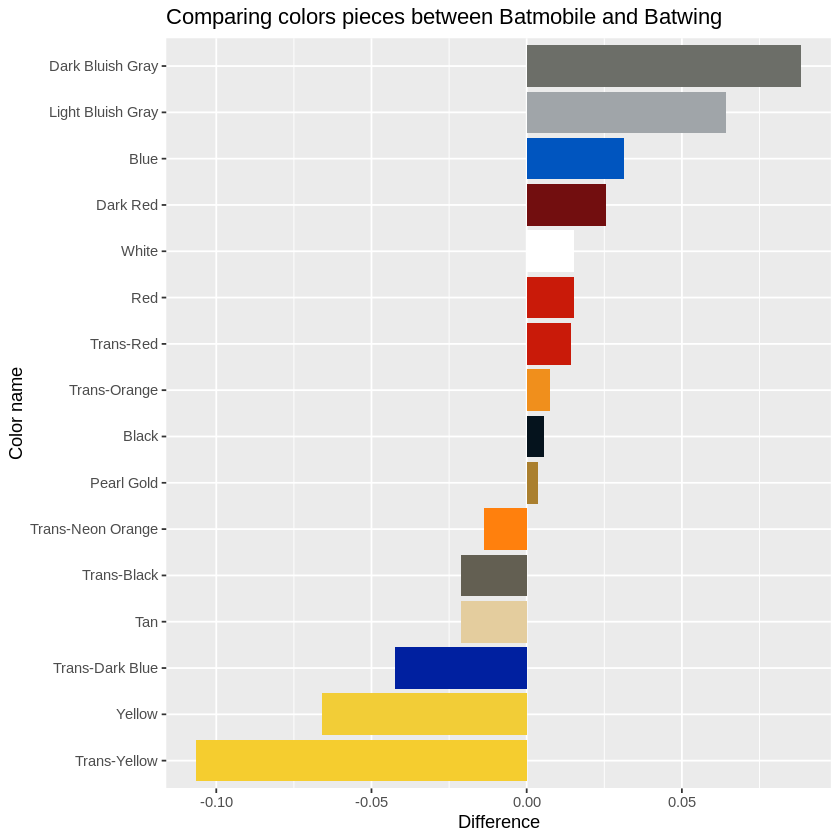

In [158]:
# Create a horizontal bar plot with reordered axis.
bat_colors %>%
  mutate(name= fct_reorder(name, diff)) %>%
  ggplot(aes(x=name, y=diff, fill=name)) + 
  geom_col() + 
  coord_flip() + 
  scale_fill_manual(values = color_palette, guide=FALSE) + 
  labs(x= "Color name", y = "Difference" , title="Comparing colors pieces between Batmobile and Batwing")